# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

<div class="alert alert-info">
    Поскольку все дальнейшие вычисления однотипные, самое удобное - создать функцию, которая будет расчитывать необходимые параметры в каждом случае. Задача функции - построить таблицу с необходимыми данными и результатами вычислений. Для наглядности, итоговые значения таблицы отразим на гистограмме.

Основные колонки таблицы:
- колонка параметра группировки. Исходный параметр
- колонка суммы значений группировки. Расчет исходного значения 
- колонка количества заемщиков в каждой группе. Расчет исходного значения
- колонка % заемщиков в группе имеющих просрочки
- колонка с % соотношением группы к общему количеству заемщиков в датафрейме (выборке)
    
Итоговое значение % заемщиков в группе имеющих просрочки, покажет зависимость между значением исходного параметра группировки и возвратом кредита в срок.
 </div>

<div class="alert alert-info">
Структура функции:
    
1. создание таблицы с группировкой по исходному параметру исследования зависимости и суммой значений просрочек
2. добавление колонки с значением количества заемщиков в каждой группе
3. добавление колонки с %-м соотношением просрочек в группе
4. добавление колонки с %-м соотношением группы к общему количеству заемщиков, для оценки реперезентативности
5. сортировка таблицы по %-му соотношению просрочек от большего к меньшему
</div>

In [22]:
import seaborn as sb # импортируем библиотеку seaborn

In [23]:
# создаем функцию по указанным выше параметрам
def rating(df, column):
    data_rate = df.groupby(column).agg({'debt':'sum'})
    data_rate['count'] = df.groupby(column)['debt'].count()
    data_rate['rate'] = data_rate['debt'] / data_rate['count'] * 100
    data_rate['prop'] = data_rate['count'] / data_rate['count'].sum() * 100
    data_rate = data_rate.sort_values(by='rate', ascending=False)
    return data_rate

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [24]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
children_rate = rating(data, 'children')
children_rate

,debt,count,rate,prop
children,,,,
4,4,41,9.756098,0.192209
2,194,2052,9.454191,9.619802
1,444,4808,9.234609,22.539965
3,27,330,8.181818,1.547044
0,1063,14091,7.543822,66.058788
5,0,9,0.000000,0.042192


<AxesSubplot:xlabel='children', ylabel='rate'>

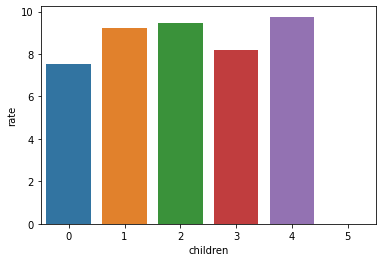

In [34]:
# построим гистограмму по таблице на данных рейтинга
# к сожалению так и не нашел как перименовать названия осей для barplot
sb.barplot(x=children_rate['rate'].index, y=children_rate['rate'])

**Вывод:** 
    
1. Тот факт, что у заемщиков, у кого 5 детей, нет задолженности, не говорит об их благонадежности. Выборка по этому значению детей нерепрезентативная, по отношению к общей массе, для объективной оценки общая выборка должная быть больше, в районе хотя бы 100 000. Доля заемщиков с детьми более 1-2 в принципе небольшая, а доля заемщиков с количеством детей 5, составляет менее 0,05%, поэтому в нашей ситуации, поскольку значения нулевые, эти данные можно игнорировать из-за нерепрезентативности. Похожая ситуация и с заемщиками у кого 4 детей, но здесь хотя бы есть на какие данные опираться.
2. Зависимость от количества детей прослеживается: у заемщиков без детей процент должников ниже чем у заемщиков с детьми. Однако разница между значениями в пределах одного процента. Самый большой разбег в разнице это в принцпе в общих группах "с детьми/без детей", поэтому тут скорее надо вести речь не о количестве детей, а о зависимости от наличии/отсутствия детей, хотя заемщики у кого трое детей показывают долю максимально близкую к заемщикам без детей. Возможно здесь уже речь идет о более высокой ответственности, чем у малодетных семей или семей с детьми более трех. Но это требует дополнительных социологических исследований.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [26]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
# в этот раз строим группировку по семейному статусу
family_rate = rating(data, 'family_status')
family_rate

,debt,count,rate,prop
family_status,,,,
Не женат / не замужем,273,2796,9.763948,13.107684
гражданский брак,385,4134,9.313014,19.380245
женат / замужем,927,12261,7.560558,57.479724
в разводе,84,1189,7.064760,5.574047
вдовец / вдова,63,951,6.624606,4.458300


<AxesSubplot:xlabel='rate', ylabel='family_status'>

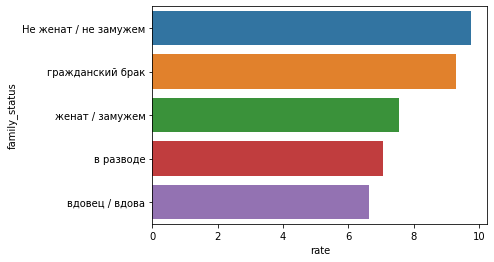

In [27]:
# поменял ориентацию гистограммы для удобстава чтения
sb.barplot(x=family_rate['rate'], y=family_rate['rate'].index)

**Вывод:** 

Определенная зависимость фактов задолженности от семейного статуса прослеживается. Неженатые/незамужние заемщики менее ответственно относятся к займам и чаще всего допускают просрочки. При этом заемщики в гражданском браке чуть реже допускают просрочки. Доля просрочек у официально женатых/замужних, даже в прошлом (в разводе, вдовцы), значительно ниже первых двух категорий. Видимо наличие официального брака, стимулирует более ответственное отношение к финансам и развитие финансовой грамотности для обеспечения семьи. При этом, потеря официального партнера в результате развода или смерти, не снижает приобретенных навыков личного финансового управления, но снижает общую финансовую нагрузку на заемщика, в связи с чем такие заемщики реже всего допускают просрочки.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [32]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
# для оценки построим таблицу с группировкой по категориям доходов
tincome_rate = rating(data, 'total_income_category')
tincome_rate

,debt,count,rate,prop
total_income_category,,,,
E,2,22,9.090909,0.103136
C,1353,15921,8.498210,74.637851
A,2,25,8.000000,0.117200
B,354,5014,7.060231,23.505696
D,21,349,6.017192,1.636116


<AxesSubplot:xlabel='total_income_category', ylabel='rate'>

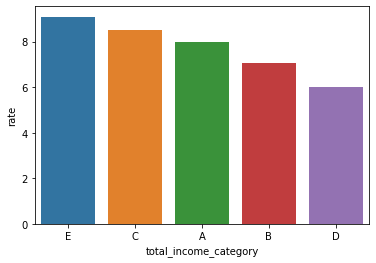

In [33]:
# строим гистограмму по категориям доходов
sb.barplot(x=tincome_rate['rate'].index, y=tincome_rate['rate'])

**Вывод:** 

Категории А (более 1 млн доход) и E (0 - 30000 доход) очень слабо представлены в выборке, их доля в районе 0,1% поэтому использование их для оценки кажется нецелесообразным, по причине нерепрезентативности результата. Однако из остальных трех категорий, самыми дисциплинированными плательщиками, допускающими просрочки реже всего, явлеются заещики из категори D, то есть с уровнем дохода 30001-50000 рублей. А вот заемщики из следующей категори С, то есть с уровнем дохода 50001–200000 рублей, являются наименее дисциплированными. Необходимо учитывать эти значения в скоринге заемщиков.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [35]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
# построим таблицу по скорректированным целям кредита
purpose_rate = rating(data, 'purpose_category')
purpose_rate

,debt,count,rate,prop
purpose_category,,,,
операции с автомобилем,400,4279,9.347978,20.060007
получение образования,369,3988,9.252758,18.695795
проведение свадьбы,183,2313,7.911803,10.843373
операции с недвижимостью,780,10751,7.255139,50.400825


<AxesSubplot:xlabel='rate', ylabel='purpose_category'>

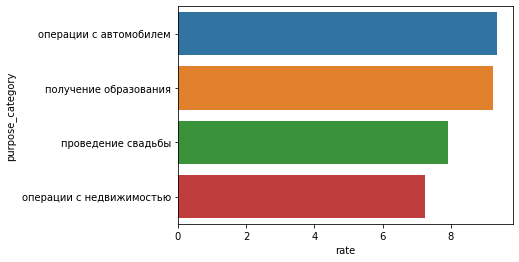

In [37]:
# строим гистограмму по новым категориям целей, снова поменяем ориентацию
sb.barplot(x=purpose_rate['rate'], y=purpose_rate['rate'].index)

**Вывод:** 

Все группы после корректировки дают репрезентативные значения, пригодные для анализа. При этом видим, что действительно разные цели влияют на количество просрочек:
 - наименее дисциплинированными являются заемщики, берущие займ на разные операции с автотранспортом
 - наиболее дисциплинированными являются заемщики, берущие займ на разные операции с недвижимостью
 - заемщики для целей образования тоже не намного надежнее тех, кто берет автокреды.

Возможно здесь есть еще зависимость от возраста заемщика, но это требует отдельного исследования и сопоставления данных.
Общий вывод такой: цель кредитования дейтствительно влияет на частоту нарушений срока возврата займа.

<div class="alert alert-info">
По свадьбам все довольно просто - большая часть кредита, если не весь, чаще всего погашаются с подаренных денег, и чаще всего там остается небольшое тело долга, которое довольно быстро и несложно погашается.
    
По недвижимости ситуация немного сложнее, тут есть несколько ситуаций:
    
1. Ипотека погашается за счет сдачи недвижимости в аренду - поэтому фактическая финансовая нагрузка у заемщиков невысокая, она компенсируется арендными доходами, которые и идут на погашение задолженности.
2. Конечно мало кто этим пользуется, но можно в бухгалтерии написать заявление на удержание из заработной платы кредитных платежей и сразу перевод их в банк в погашение кредита - этот механизм позволяет избежать просрочек
3. Ну и в целом ипотека это всегда займ под залог этой же недвижимости - риск потери жилья здорово дисциплинирует заемщиков, в отличие от тех же автокредитов.
</div>

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 

Сам факт одинакового количества пропусков наталкивает на мысль о технических причинах.
По идее можно было бы предположить, что пропуски в доходах и в трудовом стаже могли быть вызван естественными причинами: безработные не имеют стажа и не имеют дохода. Но ранее проведенная работа показывет несостоятельности гипотезы: у пенсионеров и безработных показаны аномальные цифры стажа, у безработных выявлены случаи указания дохода. Возможно что ошибка связана и с человеческим фактором. Но тогда бы соотношения пустых строк были бы разного количества. С высокой долей вероятности, учитывая аномально высокие показатели в стаже безработных и пенсионеров, а также, как ккосвенное сивидетельство, орицательные значения в количестве детей, скорее всего здесь именно техническая причина и необходимо разбираться с процессом заполнения данных.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 

Когда мы обнаруживаем пропуски в количественных переменных, необходимо смотреть на ситуацию комплексно с точки зрения влияния на результаты анализа.

Можно просто удалить строки, но если в других ячейках этих строк содержатся ценные данные, то это делать крайне нежелательно.
Например у нас было небольшая доля заемщиков с количеством детей 5. Удаление строк могло бы искуственно уменьшить одну из дургих групп и сделать получившуюся группу нерепрезентативной для оценки результатов и формирования выводов.

Если оставить как есть и проигнорировать пропуски, а такое возможно в ситуациях когда пропуски нормальная ситуация, но это могло бы повлиять на качество и адекватность расчетов % соотношений, как при расчете рейтинга для анализа влияния разных показателей на просрочки.

Для подобных ситуаций есть третий вариант - заполнить единым значением, например "0". Но у этого варианта тоже есть негативная сторона - фактически в расчетах будет приниматься 0 значение. Поэтому такой вариант будет подходящим только при условии что пропуски это по факту 0 значения.

Если есть подозрения, что пропуски это аномальная ситуация, и возможно результат технической ошибки, при невозможности восстановить эти данные намного удобнее заполнить их медианными значениями. Почему они удобнее, чем средние, ужа в курсе рассматривалось - потому что они максимально приближены к естественным значениям, а среднее арифметическое, при большом разбросе крайних значений, будет давать некорректный  вариант для заполнения.

### Шаг 4: общий вывод.

<h2>Общий вывод</h2>
    
Для улучшения системы скоринга, мы проанализировали базу информации о заемщиках, изучив разные параметры заемщиков.
    
<h3>Предобработка данных</h3>
    
В ходе предобработки данных были выявлены следующие аномалии:
- одинаковое количество пропусков (2174) в колонках days_employed (трудовой стаж) и total_income (размер дохода). При этом данные из этих колонок могут быть взаимозависимыми
- отрицательные значения трудового стажа
- аномальные значения трудового стажа
- аномальные значения доходов у заемщиков не осуществляющих трудовую деятельность
- отрицательные значения количества детей
- 71 дублирующаяся строка
    
*Эти аномалии могли быть вызваны как человеческимм фактором, так и техническими причинами.*
    
Для исправления аномалий приняты следующие меры:
- Для исправления пропусков данных в колонке с доходами заемщиков, и в колонке с трудовым стажем, пропуски заполнены медианными значениями, как наиболее оптимальными в данном случае.
- Для исправления отрицательных значений трудового стажа, они были переведены в положительные значения.
- Аномальные значения трудового стажа не иправлялись, так как невозможно установить их причину. Кроме того, эти данные не используются в проверке гипотез, а значит допустимо их оставить неизменными.
- Аномальные значения доходов у заемщиков не осуществляющих трудовую детяельность не исправлялсь, так как невозможно установить их причину, тем более что причины могут быть естественными.
- Отрицательные значения количества детей исправлены на положительные.
- Дубликаты удалены, как несущественные.

Кроме того, для упрощения оценки, была сгруппирована по категориям информация о целях займа и выделены зарплатные когорты.

<hr>
<hr>

<h3>Цели проекта и результаты</h3>

Для проверки гипотез были расчитаны:
- количество заемщиков в проверяемых когортах
- % должников с просрочкой в когорте
- относительное количество заемщиков в когорте по отношению к общей массе заемщиков

<hr>    
<b>Гипотеза № 1</b>: Есть ли зависимость между количеством детей и возвратом кредита в срок?

При проверке гипотезы были исключены из общей оценки данные по заемщикам у кого 5 и 4 детей, так как их количество в общей массе незначительное: 5 детей - 0,04% от общей массы, 4 детей - 0,19% от общей массы. Далее установлено, что при анализе, оставшихся когорт разница  между соседними когортами является незначительной: между когортой 1 и 2 ребенка разница в % должников с просрочкой составляет 0,22%, между когортой 2 и 3 ребенка разница в % должников с просрочкой составляет 1,27%. Самая большая разница между корортой без детей и когортами с 1, 2 и 3 детьми: 1.69%, 1.91% и 0,64%. Но % должников с просрочкой в когорте с 3 детьми в приниципе выбивается из общей массы когорт с любым количеством детей. Поэтому правильнее говорить что есть зависимость не столько между количеством детей и возвратом кредита в срок, сколько между самим фактом наличия детей у заемщика и возвратом кредлита в срок, так как самый низкий процент должников с просрочкой именно в к когорте без детей.
    
<b>Общий вывод по гипотезе № 1:</b> Прямой зависимости между количеством детей и возвратом кредита в срок нет, но есть зависимость между наличием детей у заемщика (не зависимо от количества) и возвратом кредита в срок.
<hr>
<b>Гипотеза № 2</b>: Есть ли зависимость между семейным положением и возвратом кредита в срок?
    
При проверке гипотезы все выборки по когортам признаны репрезентативными. При этом выявлена закономерность: самыененадежные заемщики, чаще всего допускающие просрочки это неженатые/незамужние заемщики и заемщики в гражданском браке: 9.76% и 9,31% должников с просрочкой в когорте. При этом по остальным когортам % должников значительно ниже: 7,56% должников с просрочкой среди официально женатых/замужних, 7,06% должников с просрочкой среди разведенных и 6,62% должников с просрочкой среди вдовцов. Таким образом, нет прямой зависисомти между семейным положением и возвратом кредита в срок, но прослеживается закономерность по возврату кредита в срок, между теми кто даже в прошлом был в официальном браке и теми кто ни разу в официальном браке не был.
    
<b>Общий вывод по гипотезе № 2:</b> Прямой зависимости между семейным положением и возвратом кредита в срок нет, но есть зависимость между заемщиками, кто находится или ранее находился в официальном браке - они более ответственно относятся к своим обязательствам, и заемщиками, кто ни разу не был в официальных отношениях - они чаще допускают просрочки.
<hr>
<b>Гипотеза № 3</b>: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

При проверке гипотезы, установлено, что заемщики категории А (более 1 млн доход) и E (0 - 30000 доход) очень слабо представлены в выборке: доля каждой категоии составляет 0,1% поэтому использование их для оценки целесообразно по причине нерепрезентативности результата. И это нормальная ситуация, потому что такие доходы сами по себе являются крайне редкими, а скоринг должен ориентироваться в первую очередь на наиболее представленные среди заещиков категории. Из остальных трех категорий, самыми дисциплинированными плательщиками, допускающими просрочки реже всего, явлеются заещики из категори D, то есть с уровнем дохода 30001-50000 рублей, доля просрочек среди заемщиков этой категрии составляет 6,01%. Заемщики из следующей категори С, то есть с уровнем дохода 50001–200000 рублей, являются наименее дисциплированными, доля просрочек в этой категории составляет 8,49%. Таким образом прямой линейной зависимости дисциплинированности заемщиков от уровня дохода нет, но в целом надежность заемщиков зависит от определенных категорий уровня доходов.

<b>Общий вывод по гипотезе № 3</b>: Прямой линейной зависимости между уровнем доходов и возвратом кредита в срок нет, но есть зависимость срока возврата кредита в срок от определенных категорий доходов заемщиков.
<hr>
<b>Гипотеза № 4</b>: Как разные цели кредита влияют на его возврат в срок?

При проверке гипотезы  установлено, что все группы после корректировки дают репрезентативные значения, пригодные для анализа. При этом видим, что действительно разные цели влияют на количество просрочек:
    
 - наименее дисциплинированными являются заемщики, берущие займ на разные операции с автотранспортом. Процент просрочек в этой категории составляет 9,34%.
 - лучше, но ненамного обсточит ситуация с займами на получение образования. Процент просрочек в этой категории составляет 9,25%.
 - наиболее дисциплинированными являются заемщики, берущими займ на разные операции с недвижимостью. Процент просрочек в этой категории составляет 7,25%.
 - немного хуже обсточит ситуация с заемщиками, берущими займ на  проведение свадьбы. Проент просрочек в этой категории составляет 7,91%.

Возможно здесь есть еще зависимость от возраста заемщика, но это требует отдельного исследования и сопоставления данных. В целом гипотеза подтверждается полностью - цель кредитования дейтствительно влияет на частоту нарушений срока возврата займа.

<b>Общий вывод по гипотезе № 4</b>: Гипотеза полностью подтверждается - разные цели кредита действительно влияют на его срок возврата.
    
<hr>
<hr>

<h3>Рекомендации</h3>
    
По результатам проведенной работы можно дать следующие рекомендации:
    
1. Из-за того, что в исходных данных обнаружены аномалии, которые могут свидетельствовать, как о технических, так и о человеческих ошибках, необходимо пересмотреть и проанализировать процесс формирования базы данных от первичного заполнения данных до формирования CSV файла с данными. Задачи:
    
- установить причину пропусков взаимозависимых данных
- установить причину аномальных значений трудового стажа
- установить, почему значения трудового стажа указываются в качестве отрицательных значений
- установить, каким образом и на основании чего указывается доход безработных и пенсионеров
- установить, почему в количестве детей указываются отрицательные значения

2. Необходимо модернизировать систему сбора информации о заемщиках:

- вместо ручного ввода информации о целях займа предусмотреть выбор из заранее предложенных вариантов, это позволит упростить аналитику полученных данных и автоматизировать определени скорингового балла на основе этих данных
- автоматически присваивать категорию доходов в зависимости от указываемых сведений
- предусмотреть автоматическое установление значений по умолчанию, для ситуация, когда отсутсвие данных нормально: отсутствие работы, отсутствие трудового стажа, отсутствие дохода и т.п.
- ввести категоризацию заемщиков по семейному статусу, в зависимости от того оформлялись, даже ранее, брачные отношения официально.
    
3. При формировании скорингового балла, в качестве критериев оценки использовать следующие данные, влияющие на возврат кредита в срок:
- наличие детей у заемщика (не зависимо от количества)
- были ли, даже ранее, официально оформлены семейные отношений у заемщика с супругом/супругой
- цель займа
- когорта доходов заемщиков
    
В результате данных рекомендаций можно будет автоматизировать и повысить эффективность скоринговой оценки заемщиков.